# There's a function for that!*
### Let's take a look at some of the wonderful functions provided in `src/hexmaze`!
*If there isn't and you want one, bother me about it or write one and submit a pull request!

### First load our databases so we have some good mazes to play with

In [1]:
import pandas as pd
import sys
sys.path.append("..")  # Use sys to add the parent directory (where src/hexmaze lives) to the path

# Load the maze configuration database as "maze_database"
maze_database = pd.read_pickle('../Maze_Databases/maze_configuration_database.pkl')
print(f"Here's our database of {len(maze_database)} hex mazes:")
display(maze_database.head())

# Load a dabatase of some potential barrier sequences as "barrier_sequence_database"
barrier_sequence_database = pd.read_pickle('../Barrier_Sequence_Databases/barrier_sequence_database.pkl')
print(f"Here's our database of {len(barrier_sequence_database)} barrier sequences:")
display(barrier_sequence_database.head())

Here's our database of 55896 hex mazes:


,barriers,len12,len13,len23,reward_path_lengths,path_length_difference,optimal_paths_12,optimal_paths_13,optimal_paths_23,optimal_paths_all,choice_points,num_choice_points,cycles,num_cycles,isomorphic_mazes
0,"(37, 39, 7, 41, 14, 46, 20, 23, 30)",15,17,21,"[15, 17, 21]",6,"[[1, 4, 6, 8, 10, 13, 17, 21, 26, 22, 27, 32, ...","[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...","[[2, 49, 38, 32, 27, 22, 26, 21, 17, 13, 16, 1...","[[1, 4, 6, 8, 10, 13, 17, 21, 26, 22, 27, 32, ...",{13},1,[],0,"{(37, 8, 9, 40, 20, 21, 22, 27, 28), (34, 8, 4..."
1,"(34, 36, 37, 39, 10, 45, 14, 15, 20)",17,21,19,"[17, 21, 19]",4,"[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 22, 2...","[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 25, 30, 3...","[[2, 49, 38, 32, 27, 22, 26, 21, 25, 30, 35, 2...","[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 22, 2...",{21},1,[],0,"{(34, 37, 8, 40, 10, 15, 18, 20, 26), (34, 35,..."
2,"(34, 7, 41, 11, 46, 17, 20, 28, 31)",23,19,17,"[23, 19, 17]",6,"[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...","[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...","[[2, 49, 38, 32, 27, 22, 26, 21, 25, 30, 35, 4...","[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...",{35},1,"[[38, 49, 47, 42, 37, 32]]",1,"{(35, 7, 10, 44, 20, 22, 27, 28, 31), (32, 37,..."
3,"(34, 10, 42, 12, 45, 18, 23, 25, 31)",15,19,21,"[15, 19, 21]",6,"[[1, 4, 6, 8, 11, 14, 17, 21, 26, 22, 27, 32, ...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...","[[2, 49, 38, 32, 27, 22, 26, 21, 17, 13, 16, 2...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 22, 27, 32, ...",{17},1,[],0,"{(34, 37, 8, 40, 13, 46, 15, 18, 25), (34, 37,..."
4,"(39, 9, 10, 46, 21, 22, 23, 26, 30)",23,17,17,"[23, 17, 17]",6,"[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...","[[2, 49, 38, 32, 37, 31, 36, 41, 45, 40, 35, 2...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...",{29},1,"[[32, 38, 49, 47, 42, 37], [12, 15, 19, 24, 20...",2,"{(34, 36, 8, 41, 9, 21, 23, 27, 30), (10, 11, ..."


Here's our database of 3126 barrier sequences:


,barrier_sequence,sequence_length,barrier_changes,reward_path_lengths,choice_points
18,"[(39, 7, 10, 42, 18, 20, 23, 26, 30), (37, 39,...",4,"[[26, 37], [10, 17], [20, 24]]","[[25, 19, 17], [15, 19, 19], [25, 17, 19], [17...","[{29}, {17, 26, 29}, {29}, {26}]"
34,"[(34, 36, 37, 7, 45, 14, 17, 20, 28), (34, 36,...",6,"[[17, 25], [36, 26], [26, 41], [41, 32], [34, ...","[[23, 19, 17], [15, 19, 23], [21, 19, 15], [15...","[{35}, {13}, {35}, {26, 35, 13}, {35, 36, 13},..."
45,"[(32, 34, 11, 44, 13, 46, 15, 21, 30), (32, 34...",5,"[[13, 16], [16, 10], [30, 20], [20, 36]]","[[21, 15, 19], [17, 25, 19], [19, 15, 19], [19...","[{24}, {31}, {16, 24, 31}, {31}, {16}]"
46,"[(37, 7, 42, 44, 14, 20, 25, 28, 31), (37, 7, ...",5,"[[31, 17], [17, 16], [16, 30], [37, 21]]","[[15, 17, 21], [23, 17, 17], [15, 19, 17], [15...","[{13}, {29}, {26}, {26, 13, 29}, {29}]"
60,"[(34, 37, 10, 45, 14, 15, 24, 25, 27), (34, 37...",4,"[[24, 39], [39, 28], [27, 36]]","[[19, 21, 15], [19, 15, 17], [19, 17, 15], [17...","[{36}, {16, 24, 36}, {16, 35, 36}, {16}]"


# Hex Maze Representations
A hex maze configuration can be represented in a variety of ways:

1. A set/list/frozenset/numpy array of integers defining where the barriers are placed (e.g. `{37, 7, 39, 41, 14, 46, 20, 23, 30}`, `[37, 7, 39, 41, 14, 46, 20, 23, 30]`, etc.) 
2. A comma-separated string defining where barriers are placed (e.g. `"7,14,20,23,30,37,39,41,46"`). In Spyglass, we use sorted, comma-separated strings to define maze configurations
3. A networkx graph object defining open hexes and the connections between them

All functions in the hex maze repo are compatible with all ways of specifying a hex maze. We also provide convenience functions to switch between different maze representations

Our example maze has type <class 'frozenset'>:
frozenset({np.int64(37), np.int64(39), np.int64(7), np.int64(41), np.int64(14), np.int64(46), np.int64(20), np.int64(23), np.int64(30)})
Here is the maze as a <class 'set'>: '{37, 7, 39, 41, 14, 46, 20, 23, 30}'
Here is the maze as a <class 'str'>: '7,14,20,23,30,37,39,41,46'
Here is the maze as a <class 'networkx.classes.graph.Graph'>: 'Graph with 40 nodes and 39 edges'

The maze looks like this:


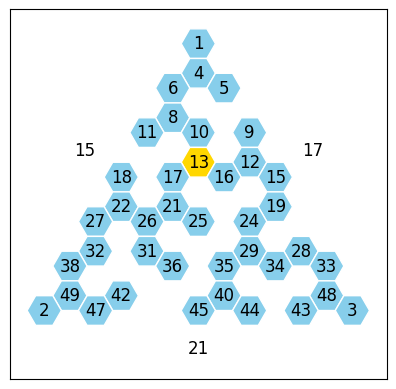

In [2]:
from src.hexmaze import maze_to_string, maze_to_barrier_set, maze_to_graph, plot_hex_maze

# Grab the first maze from the database
example_maze = maze_database.iloc[0]['barriers']
print(f"Our example maze has type {type(example_maze)}:")
print(example_maze)

# Use `maze_to_barrier_set` go from a maze specified in any valid format to a set
maze_as_set = maze_to_barrier_set(example_maze)
print(f"Here is the maze as a {type(maze_as_set)}: '{maze_as_set}'")

# Use `maze_to_string` go from a maze specified in any valid format to a string
maze_as_string = maze_to_string(example_maze)
print(f"Here is the maze as a {type(maze_as_string)}: '{maze_as_string}'")

# Use `maze_to_graph` go from a maze specified in any valid format to a networkx graph
maze_as_graph = maze_to_graph(example_maze)
print(f"Here is the maze as a {type(maze_as_graph)}: '{maze_as_graph}'")

print("\nThe maze looks like this:")
plot_hex_maze(example_maze, show_barriers=False)
# We should rarely have to use these - all hex maze functions do this conversion automatically to handle all inputs!

# Calculating hex maze attributes
So you have a maze configuration and want to know where the choice points are. Or maybe the optimal path(s) from port A to port B? Or all hexes within 2 hexes of a choice point? We can calculate all of these!

Use `get_maze_attributes` to calculate a bunch of relevant information about the maze (returned as a dictionary).

Or use a specific function to calculate what you need, or to get more specific information (e.g. how far a hex is from a port)

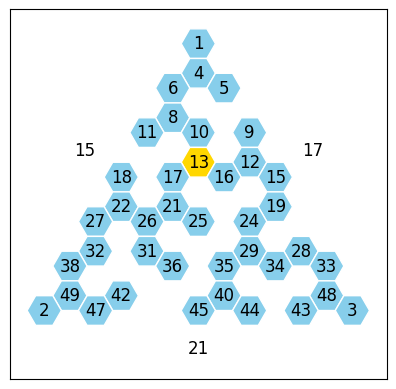

All info from 'get_maze_attributes':

barriers: {37, 7, 39, 41, 14, 46, 20, 23, 30}
len12: 15
len13: 17
len23: 21
reward_path_lengths: [15, 17, 21]
path_length_difference: 6
optimal_pct: 65.0
non_optimal_pct: 0.0
dead_end_pct: 35.0
optimal_hexes: {1, 2, 3, 4, 6, 8, 10, 12, 13, 15, 16, 17, 19, 21, 22, 24, 26, 27, 28, 29, 32, 33, 34, 38, 48, 49}
non_optimal_hexes: set()
dead_end_hexes: {35, 36, 5, 40, 9, 42, 11, 43, 44, 45, 47, 18, 25, 31}
dead_end_lengths: {1: 6, 2: 2, 3: 1}
num_dead_ends: 9
num_dead_ends_min_length_2: 3
num_dead_ends_min_length_3: 1
num_dead_ends_min_length_4: 0
optimal_paths_12: [[1, 4, 6, 8, 10, 13, 17, 21, 26, 22, 27, 32, 38, 49, 2]]
optimal_paths_13: [[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, 34, 28, 33, 48, 3]]
optimal_paths_23: [[2, 49, 38, 32, 27, 22, 26, 21, 17, 13, 16, 12, 15, 19, 24, 29, 34, 28, 33, 48, 3]]
optimal_paths_all: [[1, 4, 6, 8, 10, 13, 17, 21, 26, 22, 27, 32, 38, 49, 2], [1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, 34, 28, 33, 48, 3], [2, 49, 3

In [3]:
from src.hexmaze import plot_hex_maze, get_maze_attributes

# Example hex maze. Change maze_num to try this with different mazes!
maze_num = 0
example_maze = maze_database.iloc[maze_num]['barriers']

# Let's view the maze
plot_hex_maze(example_maze, show_barriers=False)

# Use 'get_maze_attributes' to calculate and print info about this maze
maze_info = get_maze_attributes(example_maze)
print("All info from 'get_maze_attributes':\n")
for key in maze_info:
    print(f"{key}: {maze_info[key]}")

### We can calculate much more than what is returned in that summary! 
For example:

In [4]:
from src.hexmaze import (
    get_reward_path_lengths,
    get_all_choice_points, 
    get_critical_choice_points, 
    get_optimal_paths, 
    get_optimal_paths_between_ports,
    get_path_independent_hexes_to_port,
    get_hexes_within_distance,
    get_hexes_from_port,
    get_choice_direction,
    is_valid_path,
    divide_into_thirds
)

# Get reward path lengths
reward_path_lengths = get_reward_path_lengths(maze=example_maze)
print(f"reward path lengths: {reward_path_lengths}")

# Get all hexes where the rat can make a choice
all_choice_points = get_all_choice_points(maze=example_maze)
print(f"\nAll choice points are: {all_choice_points}")

# Get critical choice points
critical_choice_points = get_critical_choice_points(maze=example_maze)
print(f"\nCritical choice points are: {critical_choice_points}")

# Get all optimal paths between reward ports
optimal_paths_between_ports = get_optimal_paths_between_ports(maze=example_maze)
print("\nOptimal paths between ports:")
for path in optimal_paths_between_ports:
    print(path)
    
# Get optimal paths between specific hexes (here, hex 1 and hex 34)
optimal_paths_between_1_and_34 = get_optimal_paths(maze=example_maze, start_hex=1, target_hex=34)
print("\nOptimal paths between hex 1 and hex 34:")
for path in optimal_paths_between_1_and_34:
    print(path)
    
# Get path-independent hexes to a reward port (can specify port as 1,2,3 or A,B,C)
path_independent_to_port_a = get_path_independent_hexes_to_port(maze=example_maze, reward_port="A")
print(f"\nPath-independent hexes to reward port A: {path_independent_to_port_a}")
path_independent_to_port_1 = get_path_independent_hexes_to_port(maze=example_maze, reward_port=1)
print(f"This is the same as saying path-independent hexes to reward port 1: {path_independent_to_port_1}")

# Get all hexes within 2 hexes of hex 13
hexes_within_dist = get_hexes_within_distance(maze=example_maze, start_hex=13, max_distance=2)
print(f"\nAll hexes within 2 hexes of hex 13: {hexes_within_dist}")
# Or all hexes exactly 2 hexes from hex 13
hexes_exact_dist = get_hexes_within_distance(maze=example_maze, start_hex=13, max_distance=2, min_distance=2)
print(f"All hexes exactly 2 hexes from hex 13: {hexes_exact_dist}")
# Or all hexes more than 2 hexes away from hex 13
hexes_more_than_dist = get_hexes_within_distance(maze=example_maze, start_hex=13, min_distance=3)
print(f"All hexes more than 2 hexes away from hex 13: {hexes_more_than_dist}")

# Calculate how far a hex is from a reward port (can specify port as 1,2,3 or A,B,C)
hexes_from_port_A = get_hexes_from_port(maze=example_maze, start_hex=10, reward_port="A")
print(f"\nHex 10 is {hexes_from_port_A} hexes from port A")
hexes_from_port_B = get_hexes_from_port(maze=example_maze, start_hex=10, reward_port=2)
print(f"Hex 10 is {hexes_from_port_B} hexes from port B")

# Is a certain path a valid path in our maze?
hex_path_1 = [1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 26, 31, 37, 42, 47, 49, 2]
path_1_valid = is_valid_path(maze=example_maze, hex_path=hex_path_1)
print(f"\nPath {hex_path_1} is valid: {path_1_valid}")
hex_path_2 = [1, 4, 5, 7, 9, 12, 16, 20, 25, 30, 35, 29, 34, 28, 33, 48, 3]
path_2_valid = is_valid_path(maze=example_maze, hex_path=hex_path_2)
print(f"Path {hex_path_2} is valid: {path_2_valid}")

# Find if a rat went left or right (regardless of maze)
choice_direction1 = get_choice_direction(start_port="A", end_port="B")
print(f"\nIf a rat went from port A to port B, his choice direction is: {choice_direction1}")
choice_direction2 = get_choice_direction(start_port=1, end_port=3)
print(f"If a rat went from port 1 (A) to port 3 (C), his choice direction is: {choice_direction2}")

# Divide the maze into the hexes near each port
maze_thirds = divide_into_thirds(maze=example_maze)
print("\nThe maze divided into thirds:")
for third in maze_thirds:
    print(third)


reward path lengths: [15, 17, 21]

All choice points are: {4, 8, 40, 12, 13, 48, 49, 21, 22, 26, 29}

Critical choice points are: {13}

Optimal paths between ports:
[1, 4, 6, 8, 10, 13, 17, 21, 26, 22, 27, 32, 38, 49, 2]
[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, 34, 28, 33, 48, 3]
[2, 49, 38, 32, 27, 22, 26, 21, 17, 13, 16, 12, 15, 19, 24, 29, 34, 28, 33, 48, 3]

Optimal paths between hex 1 and hex 34:
[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, 34]

Path-independent hexes to reward port A: {1, 4, 6, 8, 10, 13}
This is the same as saying path-independent hexes to reward port 1: {1, 4, 6, 8, 10, 13}

All hexes within 2 hexes of hex 13: {8, 10, 12, 16, 17, 21}
All hexes exactly 2 hexes from hex 13: {8, 12, 21}
All hexes more than 2 hexes away from hex 13: {1, 2, 3, 4, 5, 6, 9, 11, 15, 18, 19, 22, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 38, 40, 42, 43, 44, 45, 47, 48, 49}

Hex 10 is 4 hexes from port A
Hex 10 is 10 hexes from port B

Path [1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 2

### Identifying hexes on optimal paths, non-optimal paths, and dead ends

If we want to describe the rat's behavior over the course of a block or session, it may be helpful to track when he is in hexes on optimal paths, hexes on non-optimal paths, or hexes in dead ends. 

Depending on your research question, it may also be helpful to use mazes that have many long dead ends, or many possible non-optimal paths. 

Here are some functions to identify these hexes:

Maze: {34, 9, 42, 45, 13, 18, 27, 28, 30}

optimal_hexes : {1, 2, 3, 4, 6, 8, 11, 14, 17, 20, 21, 24, 25, 26, 29, 31, 32, 35, 37, 38, 39, 40, 43, 44, 48, 49}
optimal_pct : 65.0
non_optimal_hexes : {5, 7, 10, 12, 15, 16, 19}
non_optimal_pct : 17.5
dead_end_hexes : {33, 36, 41, 46, 47, 22, 23}
dead_end_pct : 17.5

Maze with optimal (green), non-optimal (yellow), and dead end (red) hexes highlighted:


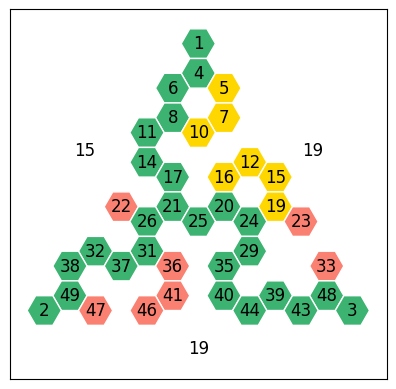

Dead end distances by hex: [{33: 1}, {41: 2, 36: 1, 46: 3}, {47: 1}, {22: 1}, {23: 1}]

Dead end lengths: {1: 4, 3: 1}

There are 5 dead ends with length >= 1
There are 1 dead ends with length >= 2
There are 1 dead ends with length >= 3
There are 0 dead ends with length >= 4

Hexes on optimal paths: {1, 2, 3, 4, 6, 8, 11, 14, 17, 20, 21, 24, 25, 26, 29, 31, 32, 35, 37, 38, 39, 40, 43, 44, 48, 49}

Hexes on longer-than-optimal (but non-dead-end) paths: {5, 7, 10, 12, 15, 16, 19}

All non dead end hexes: {1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 14, 15, 16, 17, 19, 20, 21, 24, 25, 26, 29, 31, 32, 35, 37, 38, 39, 40, 43, 44, 48, 49}

Dead end hexes: {33, 36, 41, 46, 47, 22, 23}


In [5]:
from src.hexmaze import (
    get_hexes_on_optimal_paths,
    get_non_optimal_non_dead_end_hexes, 
    get_non_dead_end_hexes,
    get_dead_end_hexes,
    classify_maze_hexes,
    get_dead_ends,
    get_dead_end_lengths,
    get_num_dead_ends,
)

# Grab some mazes from the database to look at!
maze_num = 21 # Some interesting ones = 6, 7, 10, 11, 12, 21, 22
example_maze = maze_to_barrier_set(maze_database.iloc[maze_num]["barriers"])
print(f"Maze: {example_maze}\n")

# Classify hexes as on optimal paths, on non-optimal paths, or in dead ends
hex_type_dict = classify_maze_hexes(example_maze)
# Print the list of hexes and percentage of hexes in each category
for key in hex_type_dict:
    print(f"{key} : {hex_type_dict[key]}")

# Color optimal hexes in green, non-optimal hexes in yellow, and dead-end hexes in red
hexes_list = [hex_type_dict["optimal_hexes"], hex_type_dict["non_optimal_hexes"], hex_type_dict["dead_end_hexes"]]
color_list = ["mediumseagreen", "gold", "salmon"]

# Plot the maze with hexes in each group highlighted
print("\nMaze with optimal (green), non-optimal (yellow), and dead end (red) hexes highlighted:")
plot_hex_maze(example_maze, highlight_hexes=hexes_list, highlight_colors=color_list, show_barriers=False)

# Find all dead end paths. 
# For each dead end, get a dictionary where the keys are hexes in that dead end path 
# and the values are how far into the dead end each hex is. 
dead_end_hex_distances = get_dead_ends(example_maze)
print(f"Dead end distances by hex: {dead_end_hex_distances}")

# Get a dictionary of dead end length: number of dead ends with that length
dead_end_lengths = get_dead_end_lengths(example_maze)
print(f"\nDead end lengths: {dead_end_lengths}\n")

# Get the number of dead ends with length >= min_length
for min_length in [1, 2, 3, 4]:
    num_dead_ends = get_num_dead_ends(example_maze, min_length=min_length)
    print(f"There are {num_dead_ends} dead ends with length >= {min_length}")

# We can also get the set of hexes in each group individually!

optimal_hexes = get_hexes_on_optimal_paths(example_maze)
print(f"\nHexes on optimal paths: {optimal_hexes}")

non_optimal_non_dead_end_hexes = get_non_optimal_non_dead_end_hexes(example_maze)
print(f"\nHexes on longer-than-optimal (but non-dead-end) paths: {non_optimal_non_dead_end_hexes}")

non_dead_end_hexes = get_non_dead_end_hexes(example_maze)
print(f"\nAll non dead end hexes: {non_dead_end_hexes}")

dead_end_hexes = get_dead_end_hexes(example_maze)
print(f"\nDead end hexes: {dead_end_hexes}")

### Identifying hexes in different sections of the maze

When we are investigating the rat's choices, it may be helpful to track when he is in hexes in the start, chosen, and unchosen section of the maze. The function `divide_into_thirds` returns a list of hexes between the choice point and port A, choice point and port B, and choice point and port C to help with these questions.

For mazes with more than one choice point, or a choice point that is part of a loop, the hexes in this choice area are not classified as a part of any of the maze thirds.


Maze with hexes in each third highlighted (choice point in yellow)


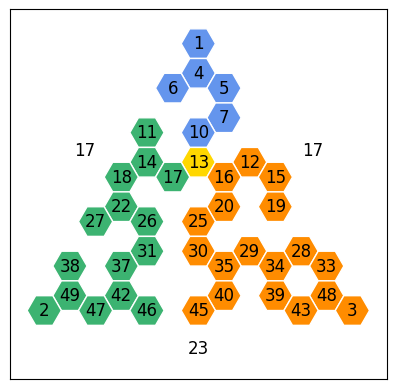

Maze with hexes in each third highlighted (choice point in yellow, unclassified hexes in default light blue)


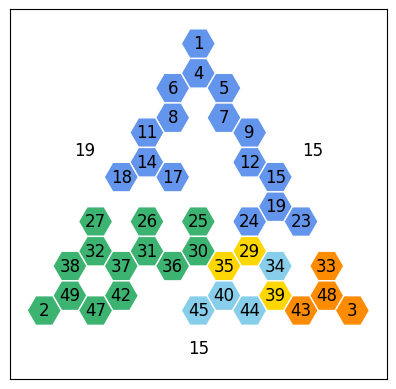

In [ ]:
from src.hexmaze import divide_into_thirds

# List of colors the same length as maze_thirds for plotting
thirds_colors = ['cornflowerblue', 'mediumseagreen', 'darkorange']

# Example maze that can be cleanly divided into thirds
example_maze_1 = {32, 36, 8, 9, 41, 44, 21, 23, 24}

# Divide the maze into thirds
maze_thirds_1 = divide_into_thirds(example_maze_1)

# Plot the maze with each third highlighted
print("Maze with hexes in each third highlighted (choice point in yellow)")
plot_hex_maze(example_maze_1, highlight_hexes=maze_thirds_1, highlight_colors=thirds_colors, show_barriers=False)

# Example maze where not all hexes are in a distinct maze third!
example_maze_2 = {8, 9, 11, 17, 20, 23, 31, 34, 38, 46}
# example_maze_2 = {10, 13, 16, 20, 21, 22, 28, 41, 46} # this is another good example of this

# Divide the maze into thirds
maze_thirds_2 = divide_into_thirds(example_maze_2)

# Plot the maze with each third highlighted
print("Maze with hexes in each third highlighted (choice points in yellow, unclassified hexes in default light blue)")
plot_hex_maze(example_maze_2, highlight_hexes=maze_thirds_2, highlight_colors=thirds_colors, show_barriers=False)


We can also look up maze attributes using the hex maze database (if the maze is in the database). But this is rarely better than just calculating them. Here it is anyway:

In [7]:
from src.hexmaze import df_lookup 

# Example hex maze
example_maze = {32, 36, 8, 9, 41, 44, 21, 23, 24}

# Use the database to look up the choice points for this maze
choice_points = df_lookup(maze_database, example_maze, 'choice_points')
print(f"The choice points for this maze are {choice_points}.")

# Use the database to look up the other mazes isomorphic to this maze
isomorphic_mazes = df_lookup(maze_database, example_maze, 'isomorphic_mazes')
print(f"\nThe isomorphic mazes for this maze are: \n{isomorphic_mazes}.")

# Get the row in the database that has all of the info for this maze
maze_info = maze_database[maze_database['barriers'] == example_maze]
print("\nHere is all of the info for this maze in our database:")
display(maze_info)

The choice points for this maze are {13}.

The isomorphic mazes for this maze are: 
{frozenset({32, 35, 8, 12, 44, 46, 16, np.int64(21), 23}), frozenset({39, 9, 42, 11, 17, 19, 24, 27, 30}), frozenset({36, 7, 44, 46, 14, 17, 20, 27, 28}), frozenset({35, 7, 40, 11, 46, 20, 26, 27, 28}), frozenset({39, 9, 42, 11, 16, 22, 23, 26, 30})}.

Here is all of the info for this maze in our database:


,barriers,len12,len13,len23,reward_path_lengths,path_length_difference,optimal_paths_12,optimal_paths_13,optimal_paths_23,optimal_paths_all,choice_points,num_choice_points,cycles,num_cycles,isomorphic_mazes
5,"(32, 36, 8, 9, 41, 44, 21, 23, 24)",17,17,23,"[17, 17, 23]",6,"[[1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 26, 31, ...","[[1, 4, 5, 7, 10, 13, 16, 20, 25, 30, 35, 29, ...","[[2, 49, 47, 42, 37, 31, 26, 22, 18, 14, 17, 1...","[[1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 26, 31, ...",{13},1,"[[28, 33, 48, 43, 39, 34]]",1,"{(32, 35, 8, 12, 44, 46, 16, 21, 23), (39, 9, ..."


## Finding the perfect maze (rotating and reflecting a hex maze)
So you have a maze configuration, but it's not quite right. What if it were rotated 120 degrees? Or perhaps flipped across one of its axes of symmetry? 

This could be mildly annoying to do by hand, but never fear! There's a function for that!

Our starting maze is: {37, 39, 7, 41, 14, 46, 20, 23, 30}. It looks like this:


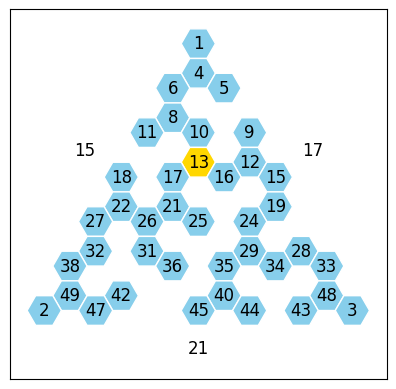

Here is our maze rotated 120 degrees counterclockwise: {32, 34, 7, 41, 11, 19, 20, 21, 23}


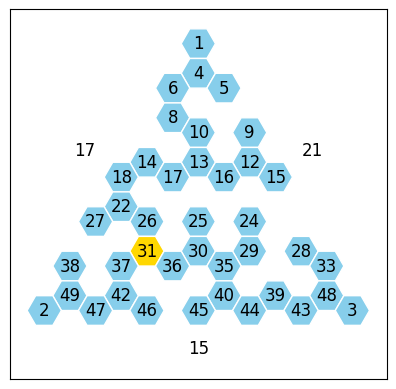

Here is our maze rotated 120 degrees clockwise: {32, 39, 10, 11, 14, 46, 19, 21, 30}


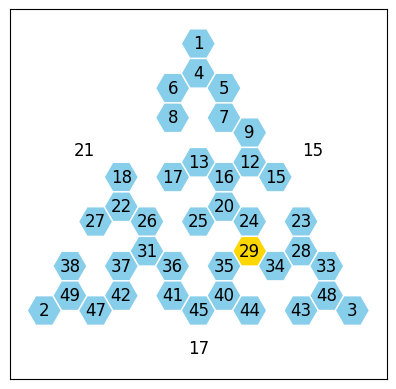

Here is our maze reflected across the axis of hex 1: {34, 8, 40, 42, 12, 44, 21, 27, 30}


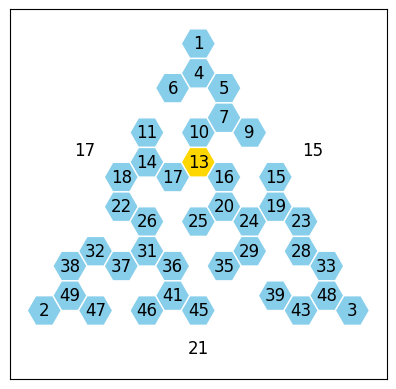

Here is our maze reflected across the axis of hex 2: {37, 8, 40, 9, 20, 21, 22, 27, 28}


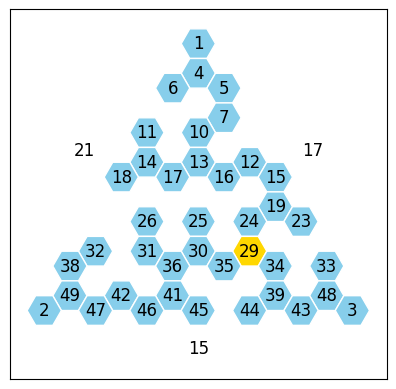

Here is our maze reflected across the axis of hex 3: {9, 10, 42, 12, 44, 20, 22, 28, 30}


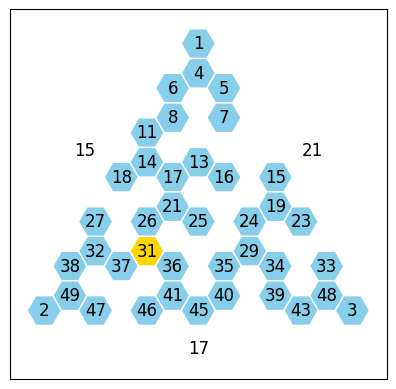

In [8]:
from src.hexmaze import get_rotated_barriers, get_reflected_barriers

# Start with an example hex maze
example_maze = {37, 39, 7, 41, 14, 46, 20, 23, 30}

# Plot the example maze
print(f"Our starting maze is: {example_maze}. It looks like this:")
plot_hex_maze(example_maze, show_stats=True, show_barriers=False)

## Now do rotations/reflections:

# Rotate the maze counterclockwise
rotated_maze_ccw = get_rotated_barriers(example_maze, direction='counterclockwise')
print(f"Here is our maze rotated 120 degrees counterclockwise: {rotated_maze_ccw}")
plot_hex_maze(rotated_maze_ccw, show_stats=True, show_barriers=False)

# Rotate the maze clockwise
rotated_maze_cw = get_rotated_barriers(example_maze, direction='clockwise')
print(f"Here is our maze rotated 120 degrees clockwise: {rotated_maze_cw}")
plot_hex_maze(rotated_maze_cw, show_stats=True, show_barriers=False)

# Reflect the maze across the axis of hex 1
reflected_maze_1 = get_reflected_barriers(example_maze, axis=1)
print(f"Here is our maze reflected across the axis of hex 1: {reflected_maze_1}")
plot_hex_maze(reflected_maze_1, show_stats=True, show_barriers=False)

# Reflect the maze across the axis of hex 2
reflected_maze_2 = get_reflected_barriers(example_maze, axis=2)
print(f"Here is our maze reflected across the axis of hex 2: {reflected_maze_2}")
plot_hex_maze(reflected_maze_2, show_stats=True, show_barriers=False)

# Reflect the maze across the axis of hex 3
reflected_maze_3 = get_reflected_barriers(example_maze, axis=3)
print(f"Here is our maze reflected across the axis of hex 3: {reflected_maze_3}")
plot_hex_maze(reflected_maze_3, show_stats=True, show_barriers=False)

### Getting all rotations and reflections
The set of all rotated and/or reflected mazes for a given maze are known as mazes that are *isomorphic* to that maze. Instead of doing all possible rotations and reflections individually, we have a function to get all of them at once.

In [9]:
from src.hexmaze import get_isomorphic_mazes

# Start with an example hex maze
example_maze = {37, 39, 7, 41, 14, 46, 20, 23, 30}

# Get all mazes isomorphic to this maze
isomorphic_mazes = get_isomorphic_mazes(example_maze)
print(f"Our starting maze is: \n{example_maze}")
print("Here are the mazes isomorphic to this maze:")
print(*(maze for maze in isomorphic_mazes), sep='\n')

Our starting maze is: 
{37, 39, 7, 41, 14, 46, 20, 23, 30}
Here are the mazes isomorphic to this maze:
frozenset({37, 8, 40, 9, 20, 21, 22, 27, 28})
frozenset({32, 34, 7, 41, 11, 19, 20, 21, 23})
frozenset({34, 8, 40, 42, 12, 44, 21, 27, 30})
frozenset({32, 39, 10, 11, 14, 46, 19, 21, 30})
frozenset({9, 10, 42, 12, 44, 20, 22, 28, 30})


# Comparing hex mazes
When comparing mazes or evaluating barrier change sequences, it's nice to have a metric for comparing how similar two maze configurations are. We can do this visually by plotting the mazes and also numerically by counting the hexes different on optimal paths.

## Plotting mazes for comparison
We can use `plot_hex_maze_comparison` to print comparison info and highlight the hexes different on optimal paths between 2 mazes! See the [`Plotting_Hex_Mazes.ipynb`](Plotting_Hex_Mazes.ipynb) tutorial notebook for more info and more plot options for comparing mazes. (This plot function is included here as an illustration of how we count "different" hexes)

Hexes on optimal paths in the first maze but not the second: {36, 14, 17, 18, 22, 26, 30, 31}
Hexes on optimal paths in the second maze but not the first: {13, 14, 16, 17, 18, 20, 22, 24, 26, 29}
There are 13 hexes different on optimal paths between the 2 mazes.


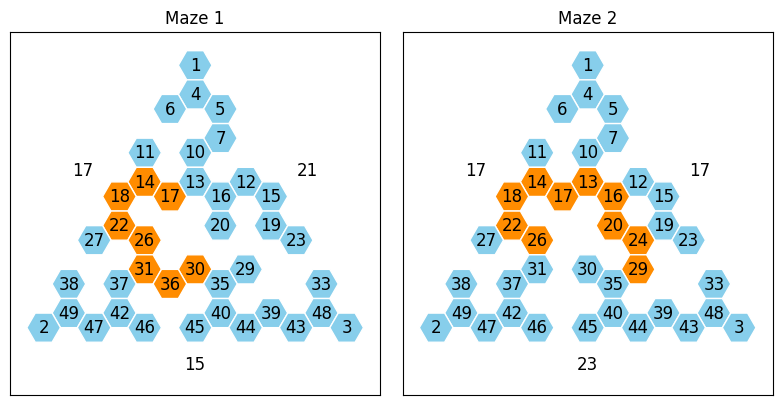

In [10]:
from src.hexmaze import plot_hex_maze_comparison

# Grab a barrier sequence from the database
barrier_sequence = barrier_sequence_database['barrier_sequence'].iloc[22]

# Take the first two mazes in the sequence to compare
maze1 = barrier_sequence[0]
maze2 = barrier_sequence[1]

# Plot the mazes for comparison
plot_hex_maze_comparison(maze1, maze2)

Let's take a closer look at this count - we count each different hex that a rat must run through on an optimal path between reward ports exactly once. For example, given the following:

`Hexes on optimal paths in the first maze but not the second: {36, 14, 17, 18, 22, 26, 30, 31}.`

`Hexes on optimal paths in the second maze but not the first: {13, 14, 16, 17, 18, 20, 22, 24, 26, 29}`

This results in a count of `13` hexes different on optimal paths. 

Note that the same hex (e.g. hex 14) may appear on both lists. This is because in maze 1, hex 14 exists on the optimal path between port 1 and port 3, but not on the optimal path between ports 2 and 3. In maze 2, hex 14 exists on the optimal path between ports 2 and 3, but not on the optimal path between ports 1 and 3. 

We choose not to count 14 twice even though it appears on both lists. Our count of 13 reflects the size of the combined sets - `{26, 22, 18, 14, 17, 13, 16, 20, 24, 29, 31, 36, 30}`.

## Getting hexes different on optimal paths
Sometimes we don't want to have to plot things, and we just want the hexes (or number of hexes) different on optimal paths.

To do this, we can use `hexes_different_on_optimal_paths` to get the set of hexes on optimal paths in maze1 but not maze2, and the set of hexes on optimal paths in maze2 but not maze1.

We can also use `num_hexes_different_on_optimal_paths` to get the number of hexes different on optimal paths between ports for maze1 and maze2 (equal to the size of the combined sets returned by `hexes_different_on_optimal_paths`).

In [11]:
from src.hexmaze import hexes_different_on_optimal_paths, num_hexes_different_on_optimal_paths

# Grab a barrier sequence from the database
barrier_sequence = barrier_sequence_database['barrier_sequence'].iloc[22]

# Take the first two mazes in the sequence to compare
maze1 = barrier_sequence[0]
maze2 = barrier_sequence[1]

# Get the hexes different on optimal paths between these 2 mazes
hexes_maze1_not_maze2, hexes_maze2_not_maze1 = hexes_different_on_optimal_paths(maze1, maze2)

# Print the different hexes
print(f"Hexes on optimal paths in the first maze but not the second: {hexes_maze1_not_maze2}")
print(f"Hexes on optimal paths in the second maze but not the first: {hexes_maze2_not_maze1}")

# Get the combined number of hexes different on optimal paths
hex_diff = num_hexes_different_on_optimal_paths(maze1, maze2)

# Print the number of different hexes
print(f"There are {hex_diff} hexes different on optimal paths between the 2 mazes.")

print("\nNote that these numbers match those shown by the comparison plot in the previous cell.")

Hexes on optimal paths in the first maze but not the second: {36, 14, 17, 18, 22, 26, 30, 31}
Hexes on optimal paths in the second maze but not the first: {13, 14, 16, 17, 18, 20, 22, 24, 26, 29}
There are 13 hexes different on optimal paths between the 2 mazes.

Note that these numbers match those shown by the comparison plot in the previous cell.


## Comparing hex mazes (including isomorphic mazes)
When evaluating how different 2 mazes are, it can also be helpful to compare to isomorphic versions of the maze.

Two mazes may appear to be very different, but they may be very similar to a rotated or reflected version of each other.

We can use `num_hexes_different_on_optimal_paths_isomorphic` to get the minimum number of hexes different on optimal paths between ports for maze1 and maze2 (when considering all isomorphic versions of these mazes). To consider rotations only, add the optional argument `type=rotation`. To consider reflections/flips only, add the optional argument `type=reflection` or `type=flip`.

This function also returns the isomporhic version of maze1 that makes it most similar to maze2.

There are 23 hexes different on optimal paths between the original 2 mazes.

Here is a comparison plot confirming the number of hexes different between the 2 mazes:

Hexes on optimal paths in the first maze but not the second: {13, 16, 20, 24, 28, 29, 31, 33, 34, 35, 36, 37, 40, 41, 45}
Hexes on optimal paths in the second maze but not the first: {13, 16, 17, 20, 21, 22, 24, 26, 27, 35, 39, 40, 43, 44}
There are 23 hexes different on optimal paths between the 2 mazes.


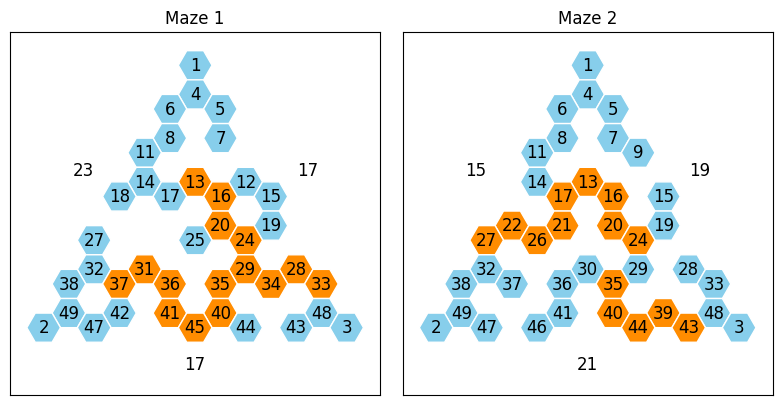



Now let's consider isomorphic comparisons!
There are 14 hexes different on optimal paths between the 2 mazes (including isomorphic comparisons).

Here is a plot showing the differences between the most similar version of maze1 and maze2.
Note that maze1 has been rotated once counterclockwise and then reflected across the axis of hex 1.

Hexes on optimal paths in the first maze but not the second: {5, 37, 7, 10, 13, 14, 18, 31}
Hexes on optimal paths in the second maze but not the first: {6, 8, 11, 14, 17, 21, 27}
There are 14 hexes different on optimal paths between the 2 mazes.


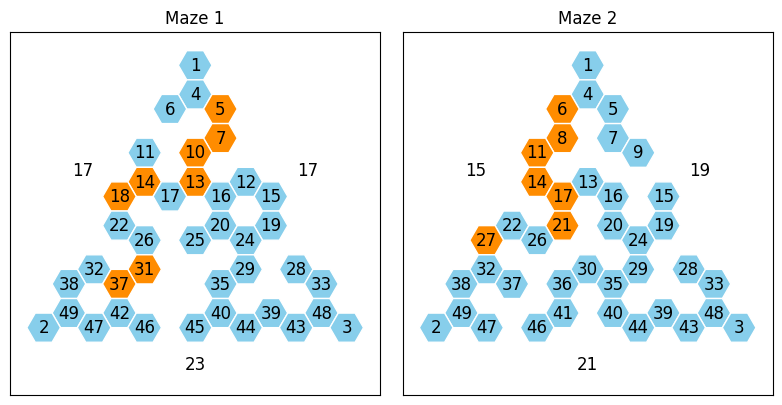

In [12]:
from src.hexmaze import num_hexes_different_on_optimal_paths, num_hexes_different_on_optimal_paths_isomorphic, plot_hex_maze_comparison

# Here are 2 example mazes to compare
maze1 = {39, 9, 10, 46, 21, 22, 23, 26, 30}
maze2 = {34, 10, 42, 12, 45, 18, 23, 25, 31}

# Print the combined number of hexes different on optimal paths (between the original 2 mazes)
hex_diff = num_hexes_different_on_optimal_paths(maze1, maze2)
print(f"There are {hex_diff} hexes different on optimal paths between the original 2 mazes.")

# Confirm with the plot
print("\nHere is a comparison plot confirming the number of hexes different between the 2 mazes:\n")
plot_hex_maze_comparison(maze1, maze2)

# Now get the combined number of hexes different on optimal paths (including isomorphic comparisons)
print("\n\nNow let's consider isomorphic comparisons!")
hex_diff_iso, most_similar_maze = num_hexes_different_on_optimal_paths_isomorphic(maze1, maze2)
print(f"There are {hex_diff_iso} hexes different on optimal paths between the 2 mazes (including isomorphic comparisons).")

# Confirm with the plot
print("\nHere is a plot showing the differences between the most similar version of maze1 and maze2.")
print("Note that maze1 has been rotated once counterclockwise and then reflected across the axis of hex 1.\n")
plot_hex_maze_comparison(most_similar_maze, maze2)